# Batch Coactivity Analysis

## Notebook for preprocessing and analyzing coactivity spine data

In [1]:
import os
import numpy as np
from Lab_Analyses.Spine_Analysis.preprocess_spine_data import organize_dual_spine_data
from Lab_Analyses.Spine_Analysis.grouped_coactivity_analysis import grouped_coactivity_analysis
from Lab_Analyses.Spine_Analysis.longitudinal_spine_characterization import Longitudinal_Spine_Data
from Lab_Analyses.Spine_Analysis.pre_coactivity_plasticity_analysis import Pre_Coactivity_Plasticity
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

### Datasets
Specify mice which mice to be processed and analyzed

In [ ]:
# Mouse ids
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW126"
id_6 = "JW129"
id_7 = "JW130"
id_8 = "JW150"

mouse_list = [id_1, id_2, id_3, id_4, id_5, id_6, id_7, id_8]
#mouse_list = [id_4, id_6]

### Preprocessing
Preprocess spine datasets

In [ ]:
# Do you want to reprocess the data
reprocess = False
channels = {"GluSnFr": "GreenCh", "Calcium": "RedCh"}
fov_type = "apical"

# Process data
if reprocess:
    for mouse in mouse_list:
        organize_dual_spine_data(mouse, channels, fov_type=fov_type, redetection=True, save=True, structural=True)

### Grouped Coactivity Analysis
Perform coactivity analysis across all mice and FOVs for a given set of imaging sessions

In [ ]:
# Set up parameters
## Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
coactivity_dir = "Coactivity_Data"
coactivity_path = os.path.join(group_path, experiment_dir, coactivity_dir)

## Analysis parameters
reanalyze = True
save = True
days = ["Early", "Middle", "Late"]
#days = ["Middle"]
followup = True
zscore = False
volume_norm = True
fov_type = "apical"

coactivity_data = {}
for day in days:
    print(f"-{day}")
    coactivity = grouped_coactivity_analysis(
        mouse_list,
        day,
        followup=followup,
        fov_type=fov_type,
        activity_window=(-2,4),
        zscore=zscore,
        volume_norm=volume_norm,
        save=save,
        save_path=coactivity_path,
    )

    coactivity_data[day] = coactivity

In [263]:
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
coactivity_dir = "Coactivity_Data"
coactivity_path = os.path.join(group_path, experiment_dir, coactivity_dir)

load_coactivity = True
if load_coactivity:
    names = ["Early_dFoF_norm_spine_coactivity_data", "Middle_dFoF_norm_spine_coactivity_data", "Late_dFoF_norm_spine_coactivity_data"]
    data = load_pickle(names, coactivity_path)
    days = ["Early", "Middle", "Late"]
    coactivity_data = dict(zip(days, data))

### Longitudinal Analysis
Assess variables longitudinally across the entire training duration

In [ ]:
# Save path
group_path = r"C:\Users\Jake\Desktop\Analyzed_data\grouped"
experiment_dir = "Dual_Spine_Imaging"
longitudinal_dir = "Longitudinal_Data"
longitudinal_path = os.path.join(group_path, experiment_dir, longitudinal_dir)

In [ ]:
## Analysis parmeters
threshold = 0.3
exclude = "Shaft Spine"
save = False
longitudinal_data = Longitudinal_Spine_Data(
    coactivity_data, 
    threshold, 
    exclude, 
    vol_norm=False, 
    save=save, 
    save_path=longitudinal_path)

In [ ]:
# Print out variable names
for key in longitudinal_data.__dict__.keys():
    print(key)

In [ ]:
## Visualize the data
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
figure_path = os.path.join(initial_path, experiment_dir, longitudinal_dir)
longitudinal_data.plot_longitudinal_data(
    variable_name="dend_dend_movement_correlation",
    group_type=None,
    plot_ind="line",
    figsize=(3,4),
    ytitle="ytitle",
    mean_color="black",
    ylim=(-0.2,1),
    save=True,
    save_path=figure_path
)

In [ ]:
import spine_plotting as sp
print(len(longitudinal_data.spine_relative_volumes["Middle"]))
sp.plot_histogram(longitudinal_data.spine_relative_volumes["Middle"], bins=40, max_x=8, avlines=[1], stat="probability", title="relative_volumes", xtitle="Relative Volume", alpha=0.5, figsize=(5,3), save=False, save_path=figure_path)

### Coactivity Plasticity Analysis
Perform analysis to relate subsequent plasticity to coactivity 

In [3]:
## Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
plasticity_dir = "Coactivity_Plasticity"
plasticity_path = os.path.join(group_path, experiment_dir, plasticity_dir)

In [264]:
## Analysis parameters
threshold = 0.3
exclude = "Shaft Spine"
save = True

plasticity_data = {}
for key, value in coactivity_data.items():
    plasticity = Pre_Coactivity_Plasticity(
        value, threshold, exclude, vol_norm=False, save=save, save_path=plasticity_path
    )
    plasticity_data[key] = plasticity

### Visualize Coactivity Plasticity Data
Plot selected data and variables from individual datasets.
Use data generated above of load in a dataset

In [265]:
# Select data to plot
load_data = False
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
figure_path = os.path.join(initial_path, experiment_dir, plasticity_dir, "Early")
if not os.path.isdir(figure_path):
    os.makedirs(figure_path)
if load_data:
    load_name = "Early_dFoF_zscore_0.3_coactivity_plasticity_data"
    plot_data = load_pickle([load_name], plasticity_path)[0]
else:
    plot_data = plasticity_data["Early"]


In [6]:
# Print out variable names
for key in plot_data.__dict__.keys():
    print(key)

day
threshold
exclude
vol_norm
parameters
save
save_path
group_dict
relative_volumes
enlarged_spines
shrunken_spines
stable_spines
mouse_id
FOV
dendrite_number
dendrite_length
spine_flags
followup_flags
spine_volumes
spine_volumes_um
followup_volumes
followup_volumes_um
movement_spines
nonmovement_spines
rwd_movement_spines
rwd_nonmovement_spines
movement_dendrites
nonmovement_dendrites
rwd_movement_dendrites
rwd_nonmovement_dendrites
spine_activity_rate
dend_activity_rate
distance_activity_rate
ind_distance_activity_rate
distance_relative_activity_rate
ind_distance_relative_activity_rate
distance_coactivity_rate
ind_distance_coactivity_rate
distance_correlation
ind_distance_correlation
distance_coactivity_rate_norm
ind_distance_coactivity_rate_norm
MRS_distance_coactivity_rate
MRS_distance_coactivity_rate_norm
nMRS_distance_coactivity_rate
nMRS_distance_coactivity_rate_norm
movement_distance_coactivity_rate
movement_distance_coactivity_rate_norm
nonmovement_distance_coactivity_rate
no

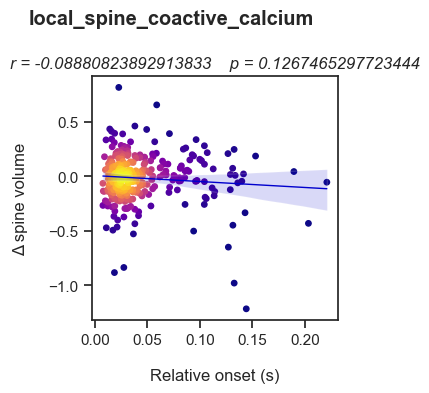

In [266]:
# Correlation Plots
plot_data.plot_volume_correlation(
    variable_name="local_spine_coactive_calcium",
    volume_type="relative_volume",
    CI=95,
    figsize=(3.7,4),
    xtitle="Relative onset (s)",
    xlim=None,
    ylim=None,
    face_color="cmap",
    edge_color="white",
    edge_width=1,
    s_size=15,
    s_alpha=0.8,
    line_color="mediumblue",
    line_width=1,
    log_trans=True,
    save=False,
    save_path=figure_path
)

F statistic: 0.15238877649687765     p_value: 0.9266360618899351
╒════════════════════════════════════╤═══════════════════╕
│ comparison                         │   adjusted p-vals │
╞════════════════════════════════════╪═══════════════════╡
│ enlarged_spines vs shrunken_spines │          0.972583 │
├────────────────────────────────────┼───────────────────┤
│ enlarged_spines vs stable_spines   │          0.972583 │
├────────────────────────────────────┼───────────────────┤
│ shrunken_spines vs stable_spines   │          0.972583 │
╘════════════════════════════════════╧═══════════════════╛


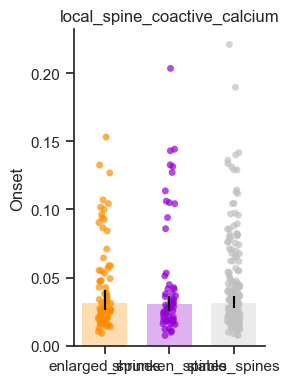

In [267]:
# Group mean activity plots
plot_data.plot_group_scatter_plot(
    variable_name="local_spine_coactive_calcium",
    group_type="plastic_spines",
    mean_type="median",
    err_type="CI",
    figsize=(3,4),
    ytitle="Onset",
    ylim=None,
    s_colors=["darkorange", "darkviolet", "silver"],
    s_size=5,
    s_alpha=0.7,
    b_colors=["darkorange", "darkviolet", "silver"],
    b_edgecolors = "black",
    b_err_colors="black",
    b_width=0.7,
    b_linewidth=0,
    b_alpha=0.3,
    test_type="nonparametric",
    test_method="holm-sidak",
    save=False,
    save_path=figure_path,
)

╒══════════════════════════════════════════╤═══════════╤══════╤════════════╤════════════╕
│                                          │    sum_sq │   df │          F │     PR(>F) │
╞══════════════════════════════════════════╪═══════════╪══════╪════════════╪════════════╡
│ C(rwd_movement_spines)                   │ 0.219375  │    1 │   6.62383  │   0.010544 │
├──────────────────────────────────────────┼───────────┼──────┼────────────┼────────────┤
│ C(plastic_spines)                        │ 0.0245665 │    2 │   0.370883 │   0.690442 │
├──────────────────────────────────────────┼───────────┼──────┼────────────┼────────────┤
│ C(rwd_movement_spines):C(plastic_spines) │ 0.116415  │    2 │   1.75753  │   0.174248 │
├──────────────────────────────────────────┼───────────┼──────┼────────────┼────────────┤
│ Residual                                 │ 9.90258   │  299 │ nan        │ nan        │
╘══════════════════════════════════════════╧═══════════╧══════╧════════════╧════════════╛
╒═════════

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


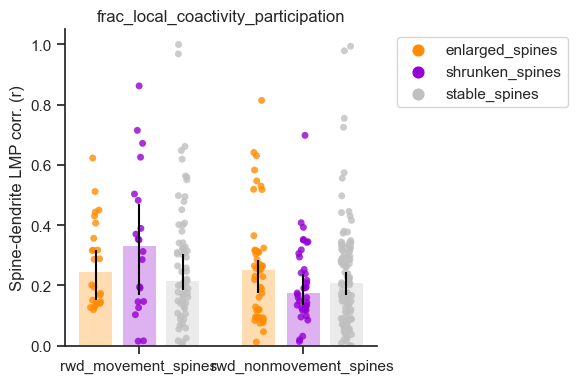

In [250]:

plot_data.plot_multi_group_scatter_plots(
    variable_name="frac_local_coactivity_participation",
    group_type="rwd_movement_spines",
    subgroup_type="plastic_spines",
    mean_type="median",
    err_type="CI",
    figsize=(6,4),
    ytitle="Spine-dendrite LMP corr. (r)",
    ylim=None,
    s_colors=["darkorange", "darkviolet", "silver"],
    s_alpha=0.8,
    s_size=5,
    b_colors=["darkorange", "darkviolet", "silver"],
    b_edgecolors="black",
    b_err_colors="black",
    b_width=0.2,
    b_linewidth=0,
    b_alpha=0.3,
    test_method="holm-sidak",
    save=False,
    save_path=figure_path,
)

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\pingouin\distribution.py:1006: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


╒═════════════╤═════════════╤═══════╤════════╤════════════╤═══════════╤═════════════╤═════════════╤═════════════╕
│ Source      │          SS │   DF1 │    DF2 │         MS │         F │       p-unc │         np2 │         eps │
╞═════════════╪═════════════╪═══════╪════════╪════════════╪═══════════╪═════════════╪═════════════╪═════════════╡
│ group       │   0.0908682 │     2 │    297 │ 0.0454341  │   0.11201 │ 0.894073    │ 0.000753707 │ nan         │
├─────────────┼─────────────┼───────┼────────┼────────────┼───────────┼─────────────┼─────────────┼─────────────┤
│ rm_val      │ 390.741     │   359 │ 106623 │ 1.08842    │ 856.689   │ 0           │ 0.742565    │   0.0139176 │
├─────────────┼─────────────┼───────┼────────┼────────────┼───────────┼─────────────┼─────────────┼─────────────┤
│ Interaction │   1.31065   │   718 │ 106623 │ 0.00182541 │   1.43678 │ 1.51455e-13 │ 0.00958256  │ nan         │
╘═════════════╧═════════════╧═══════╧════════╧════════════╧═══════════╧═════════════╧═══

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0, flags=flags)


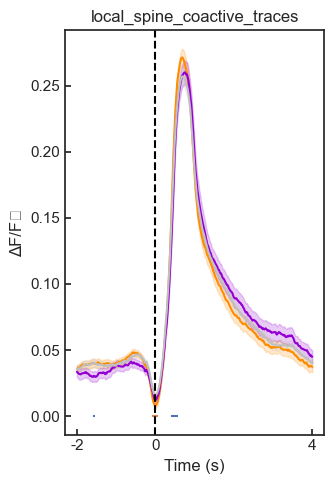

In [271]:
plot_data.plot_group_spine_mean_traces(
    group_type="plastic_spines",
    trace_type="local_spine_coactive_traces",
    exclude=[],
    avlines=[0],
    ahlines=[0,0,0],
    figsize=(3.5,5),
    colors=["darkorange", "darkviolet", "silver"], 
    ylim=None,
    test_method="fdr_bh",
    save=False,
    save_path=figure_path
)

enlarged_spines: r = -0.23852973111907572    p-val = 2.3256622200036134e-07
shrunken_spines: r = -0.24296681825567523    p-val = 2.188160182120149e-06
stable_spines: r = -0.1893705873232349    p-val = 1.6151885824355356e-10
╒═════════════╤═══════════╤═══════╤═══════╤════════════╤══════════╤════════════╤═══════════╤════════════╕
│ Source      │        SS │   DF1 │   DF2 │         MS │        F │      p-unc │       np2 │        eps │
╞═════════════╪═══════════╪═══════╪═══════╪════════════╪══════════╪════════════╪═══════════╪════════════╡
│ group       │ 0.146793  │     2 │   120 │ 0.0733967  │  2.47049 │ 0.0888343  │ 0.0395465 │ nan        │
├─────────────┼───────────┼───────┼───────┼────────────┼──────────┼────────────┼───────────┼────────────┤
│ rm_val      │ 0.29392   │     7 │   840 │ 0.0419886  │ 16.3968  │ 2.5022e-20 │ 0.120214  │   0.746086 │
├─────────────┼───────────┼───────┼───────┼────────────┼──────────┼────────────┼───────────┼────────────┤
│ Interaction │ 0.0578622 │    14 

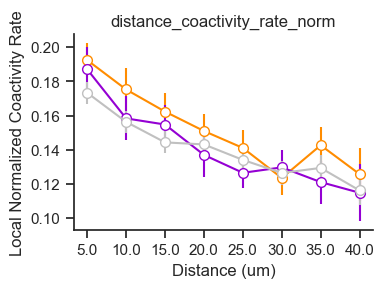

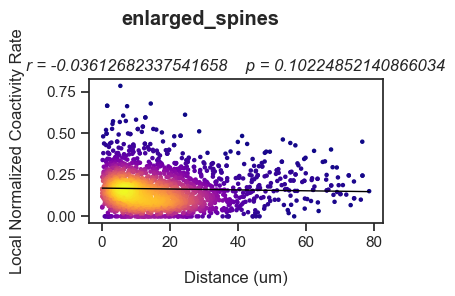

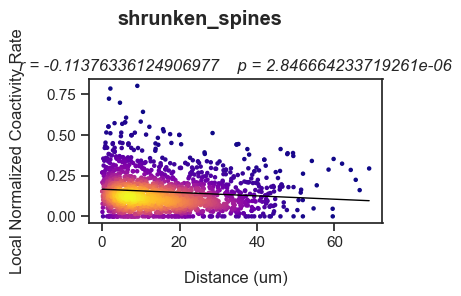

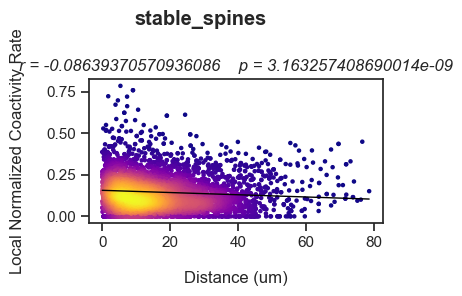

In [240]:
plot_data.plot_spine_coactivity_distance(
    variable_name="distance_coactivity_rate_norm",
    group_type="plastic_spines",
    figsize=(4,3),
    colors=["darkorange", "darkviolet", "silver"],
    m_size=7,
    ylim=None,
    ytitle="Local Normalized Coactivity Rate",
    test_method="fdr_bh",
    save=True,
    save_path=figure_path,
)

In [ ]:
plot_data.plot_histogram(
    variable="movement_dend_onset",
    bins=30,
    max_lim=None,
    group_type="plastic_spines",
    exclude=["stable_spines"],
    stat="probability",
    avlines="median",
    figsize=(5,5),
    color=["darkorange", "darkviolet"],
    alpha=0.5,
    save=True,
    save_path=figure_path
)

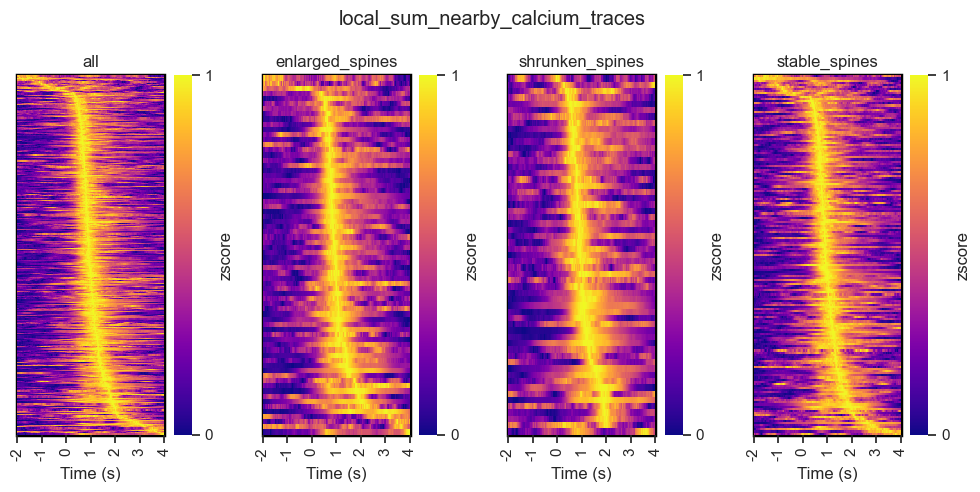

In [260]:
plot_data.plot_group_mean_heatmaps(
    trace_type="local_sum_nearby_calcium_traces",
    group_type="plastic_spines",
    figsize=(10,5),
    hmap_range=(0,1),
    center=None,
    sorted="peak",
    normalize=True,
    cmap="plasma",
    save=False,
    save_path=figure_path
)

-------------------- Comparisions to Chance ----------------------
enlarged_spines vs. shuffle: p above = 0.9381  p below = 0.0619


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\spine_plotting.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=groups)


shrunken_spines vs. shuffle: p above = 0.2852  p below = 0.7148


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\spine_plotting.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=groups)


stable_spines vs. shuffle: p above = 0.2223  p below = 0.7777


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\spine_plotting.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=groups)


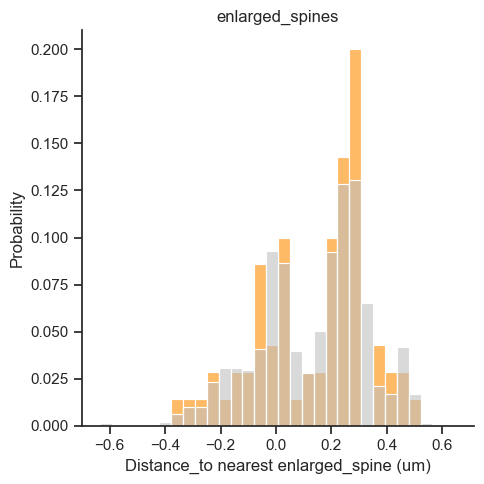

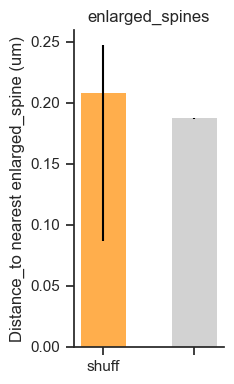

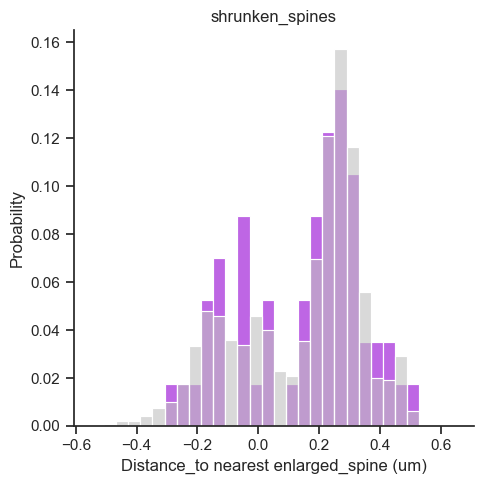

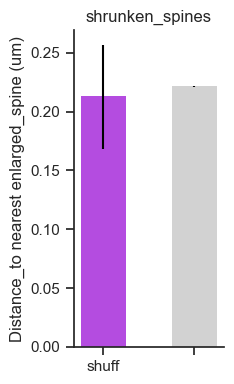

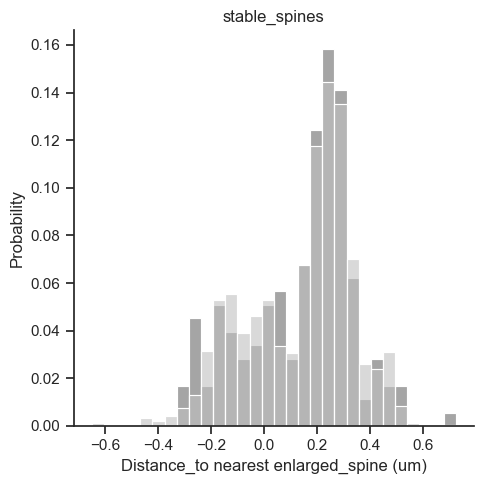

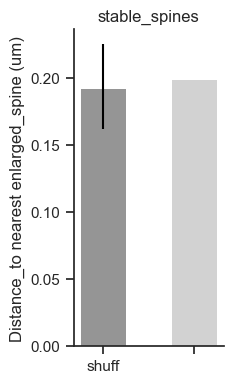

In [137]:
plot_data.plot_cluster_data(
    real_variable="nearby_LMP_corr",
    shuff_variable="shuff_LMP_corr",
    group_type="plastic_spines",
    mean_type="median",
    err_type="CI",
    hist_bins=30,
    hist_size=(5,5),
    bar_size=(2.5,4),
    ytitle="Distance_to nearest enlarged_spine (um)",
    colors=["darkorange", "darkviolet", "dimgrey"],
    err_colors="black",
    b_width=0.5,
    hist_alpha=0.6,
    b_alpha=0.7,
    save=False,
    save_path=figure_path,
)

In [ ]:
from Lab_Analyses.Spine_Analysis import spine_plotting as sp

In [ ]:
non_local = np.nonzero(~np.isnan(plot_data.local_coactivity_rate / plot_data.spine_activity_rate))[0]
non_dend = np.nonzero(~np.isnan(plot_data.relative_volumes))[0]
non_nan = set(non_local).intersection(non_dend)
non_nan = np.array(list(non_nan))
local = plot_data.local_coactivity_rate[non_nan] / plot_data.spine_activity_rate[non_nan]
dend = np.log10(plot_data.relative_volumes[non_nan])
sp.plot_sns_scatter_correlation(
    local,
    dend,
    CI=95,
    title="Relative Volume Comparison",
    xtitle="local_coactivity",
    ytitle="global_coactivity",
    marker_size=20,
    face_color="cmap",
    
)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
non_activity = np.nonzero(~np.isnan(plot_data.spine_activity_rate))[0]
non_coactivity = np.nonzero(~np.isnan(plot_data.avg_nearby_spine_rate))[0]
non_nan = set(non_activity).intersection(non_coactivity)
non_nan = np.array(list(non_nan))
activity = plot_data.avg_nearby_spine_rate
coactivity = plot_data.avg_local_coactivity_rate_norm
vol = np.log10(plot_data.relative_volumes[non_nan])

In [ ]:
norm_coactivity = coactivity / activity

In [ ]:
data_dict= {"enlarged": norm_coactivity[plot_data.enlarged_spines],
          "shurnken": norm_coactivity[plot_data.shrunken_spines],
          "stable": norm_coactivity[plot_data.stable_spines]}

In [ ]:
sp.plot_swarm_bar_plot(
    data_dict,
    mean_type="median",
    err_type="CI",
    b_colors=["darkorange", "darkviolet", "silver"],
    s_colors=["darkorange", "darkviolet", "silver"],
    ylim=(0,0.2),
)

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def plot_data(x, y, ax=None, save=False, tick_len=5, remove=False):
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_title("Title\nSubtitle")
    ax.plot(x, -np.array(y), label="A")
    if remove:
        pass
    ax.plot(x, y, label="B")

    ax.legend( loc='upper right', borderaxespad=0., fontsize="xx-small", frameon=False)
    
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.tick_params(axis="both", which="major", direction="in", length=tick_len, width=2)
    ax.tick_params(axis="both", which="minor", direction="in", length=tick_len/1.5, width=2)
    for axis in ax.spines.keys():
        ax.spines[axis].set_linewidth(2)

    if save is True:
        plt.savefig("test.jpeg")

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(5,5), gridspec_kw={'width_ratios': [1, 2]})
fig.tight_layout()
plot_data([1,2,3,4], [1,2,3,4], axs[0][0], tick_len=5, remove=True)
plot_data([1,2,3,4], [2,4,6,8], axs[0][1], tick_len=5)
plot_data([1,2,3,4], [1,2,3,4], axs[1][0], tick_len=5)
plot_data([1,2,3,4], [2,4,6,8], axs[1][1], tick_len=5)


In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
ax.stripplot(data=[1,2,3,4])

In [ ]:
import scipy.stats as stats

In [ ]:
stats.ranksums(group1, group2)

In [ ]:
u, p = stats.mannwhitneyu(group1, group2)
print(u)

In [ ]:
u2 = len(group2) * len(group1) - u
print(u2)

In [ ]:
fig, axes = plt.subplot_mosaic([["left", "right top"], ["left", "right bottom"]], figsize=(5,3), constrained_layout=True)
#fig.subplots_adjust(hspace=0.5)
#fig.tight_layout()
axes["left"].set_ylabel("Hello\nWorld")

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle?

In [ ]:
path = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW092\aligned_data\FOV2_apical\Early\JW092_Early_GluSnFr_aligned_activity.pickle"

In [ ]:
data = load_pickle([path])[0]

In [14]:
from Lab_Analyses.Behavior.align_lever_behavior import align_lever_behavior
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

In [15]:
load_path = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW130\behavior\221017\JW130_221017_processed_lever_data"
behavior = load_pickle([load_path])[0]

In [16]:
b_frames = behavior.behavior_frames

In [232]:
spines = np.nonzero(plot_data.dendrite_number == 1)

In [233]:
spines

(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53], dtype=int64),)

In [235]:
plot_data.dendrite_number

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  5.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8

In [34]:
behavior.processed_dFoF["Dendrite"].shape

(65715, 1)